In [128]:
#라이브러리 로딩
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split


import koreanize_matplotlib
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

데이타검토 및 결측치파악

In [129]:
#데이타검토
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
#데이타 개수및 유형파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [131]:
# 문자형 통계값
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [132]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x) if x and x.replace('.', '').isdigit() else 0)

In [133]:
# 숫자형 통계값
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

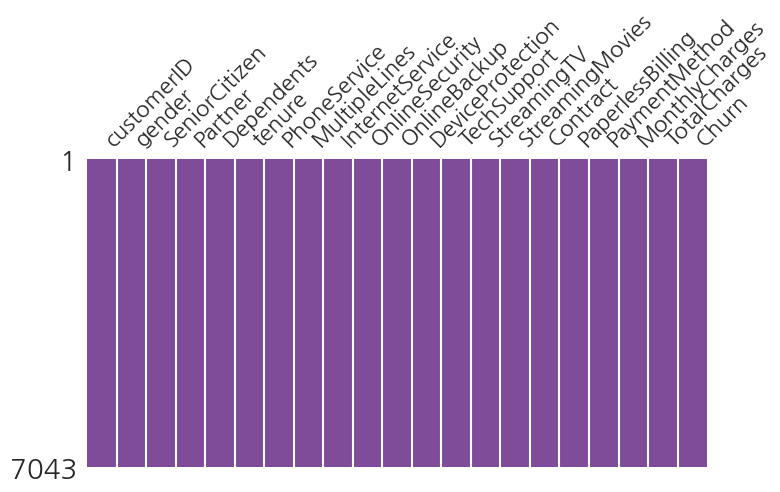

In [134]:
#결측치 시각화
import missingno as msno

fig, ax = plt.subplots(figsize=(8, 4))  # 가로 6, 세로 4 크기의 그래프
msno.matrix(df=df.iloc[:, :], color=(0.5, 0.3, 0.6), ax=ax)

In [135]:
# 결측치 카운트
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 📌 미션 1) - 학습, 예측 데이터셋을 나눠주세요.

X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
예측에 사용할 데이터셋 예) 실전 시험문제
y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
y_test : label_name 에 해당 되는 컬럼만 test에서 가져옵니다.
예측에 사용할 정답 값 예) 실전 문제의 정답
아래의 형태로 데이터셋을 나누되, train 데이터셋의 shape 는 (5625, 9), test 데이터셋의 shape 는 (1407, 9) 이 되도록 합니다. 행의 customerID 는 섞여도 상관 없으며 아래와 순서가 달라도 되며, train, test의 shape 값의 행의 수가 8:2 로 나뉘면 됩니다

In [136]:
#전체칼럼확인
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
# 피쳐데이타와 라벨데이타 분리
feature_names = df.columns[:-1].tolist()
label_names = df.columns[-1:]
print(feature_names,label_names)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] Index(['Churn'], dtype='object')


In [138]:
# 전체 칼럼
column_names = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [139]:

# 숫자형 데이타빼고는 라벨링
to_encode_names =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [140]:

df1 = df[column_names].copy()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [143]:
df_encoded = pd.get_dummies(df, columns=to_encode_names, prefix='en')

In [144]:
df_encoded

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,en_Female,en_Male,en_0,en_1,en_No,...,en_Yes,en_Month-to-month,en_One year,en_Two year,en_No,en_Yes,en_Bank transfer (automatic),en_Credit card (automatic),en_Electronic check,en_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.95,1889.50,No,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,Yes,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.30,1840.75,No,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.70,151.65,Yes,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,No,False,True,True,False,False,...,True,False,True,False,False,True,False,False,False,True
7039,2234-XADUH,72,103.20,7362.90,No,True,False,True,False,False,...,True,False,True,False,False,True,False,True,False,False
7040,4801-JZAZL,11,29.60,346.45,No,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
7041,8361-LTMKD,4,74.40,306.60,Yes,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [123]:
# 문자형을 모두 라벨링

from sklearn.preprocessing import LabelEncoder
# df['칼럼명'] = label_encoder.fit_transform(df['칼럼명'])
le = LabelEncoder()
df1[to_encode_names] = df1[to_encode_names].apply(lambda x: le.fit_transform(x))

df1[to_encode_names]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [124]:
# 라벨데이타도 라벨링
df[label_names] = df[label_names] .apply(lambda x: le.fit_transform(x))
df[label_names]

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [125]:
X =df1.copy()
y = df[label_names].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [126]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634, 1) (1409, 1)


In [127]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6328,0,0,0,0,70,1,2,0,2,2,2,2,2,2,2,0,1,89.75,6367.20
5291,0,0,1,0,68,1,2,1,0,2,2,0,0,0,1,0,1,86.45,5762.95
4619,1,0,1,0,3,1,2,1,0,0,0,2,0,0,0,1,0,79.65,251.75
5703,1,1,0,0,72,1,2,2,1,1,1,1,1,1,2,0,0,25.40,1809.35
2767,0,0,0,1,46,1,2,1,0,0,2,2,0,0,0,1,0,84.80,3958.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,0,0,1,0,47,1,0,1,0,0,2,0,0,2,0,1,2,85.30,4045.65
5000,1,0,0,0,6,1,0,0,0,0,0,2,0,0,0,1,1,49.50,312.70
4051,0,0,1,0,72,1,2,1,0,2,0,0,2,2,2,1,1,97.70,6869.70
1517,1,0,1,0,56,1,2,1,2,0,0,0,2,2,1,1,2,100.55,5514.95
